In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer

In [30]:
df = pd.read_csv(r"C:\Users\yzdn\Desktop\Data Science\Intern Projects\Retail Analysic\Raw Data\customers.csv")

In [31]:
df.head()

,customer_id,first_name,last_name,gender,age,signup_date,region
0,C0000,Patrick,Morgan,Male,18.0,2024-07-11,South
1,C0001,Eric,Lee,Other,36.0,2020-09-20,East
2,C0002,Thomas,Pena,Female,NaN,2021-03-07,East
3,C0003,Dalton,Duran,Male,24.0,2021-08-29,South
4,C0004,Travis,Mcclain,Male,50.0,2023-03-29,South


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  816 non-null    object 
 1   first_name   816 non-null    object 
 2   last_name    816 non-null    object 
 3   gender       816 non-null    object 
 4   age          776 non-null    float64
 5   signup_date  816 non-null    object 
 6   region       816 non-null    object 
dtypes: float64(1), object(6)
memory usage: 44.8+ KB


In [33]:
df.isnull().sum()

customer_id     0
first_name      0
last_name       0
gender          0
age            40
signup_date     0
region          0
dtype: int64

In [34]:
df["age"] = df["age"].fillna("0")

In [35]:
df["age"] = df["age"].astype(int)

In [36]:
str_cols = ["customer_id","first_name","last_name","gender","region"]
for col in str_cols:
    df[col] = df[col].astype(str).str.strip()

In [37]:
df["first_name"] = df["first_name"].str.strip().str.lower()
df["last_name"] = df["last_name"].str.strip().str.lower()
df["gender"] = df["gender"].str.strip().str.lower()
df["region"] = df["region"].str.strip().str.lower()


In [38]:
df.duplicated().sum()

np.int64(16)

In [39]:
df = df.drop_duplicates()

In [40]:
for col in df.columns:
    df[col] = df[col].astype(str)

    df[col] = df[col].str.strip().replace(r'\s+', ' ', regex=True)

    df[col] = pd.to_numeric(df[col], errors='ignore')

C:\Users\yzdn\AppData\Local\Temp\ipykernel_2448\945736489.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\yzdn\AppData\Local\Temp\ipykernel_2448\945736489.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\yzdn\AppData\Local\Temp\ipykernel_2448\945736489.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\yzdn\AppData\Local\Temp\ipykernel_2448\945736489.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without p

In [41]:
df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce")
df["signup_date"] = df["signup_date"].dt.normalize()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  800 non-null    object        
 1   first_name   800 non-null    object        
 2   last_name    800 non-null    object        
 3   gender       800 non-null    object        
 4   age          800 non-null    int64         
 5   signup_date  800 non-null    datetime64[ns]
 6   region       800 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 50.0+ KB


In [43]:
df["gender"].value_counts()

gender
female    287
male      275
other     238
Name: count, dtype: int64

In [44]:
df["region"].unique()

array(['south', 'east', 'north', 'west'], dtype=object)

In [45]:
df.describe()

,age,signup_date
count,800.000000,800
mean,41.947500,2022-10-23 04:04:48
min,0.000000,2020-04-11 00:00:00
25%,29.000000,2021-07-13 12:00:00
50%,43.000000,2022-11-22 12:00:00
75%,57.000000,2024-01-15 18:00:00
max,70.000000,2025-04-09 00:00:00
std,17.760674,NaN


<Axes: xlabel='age', ylabel='Count'>

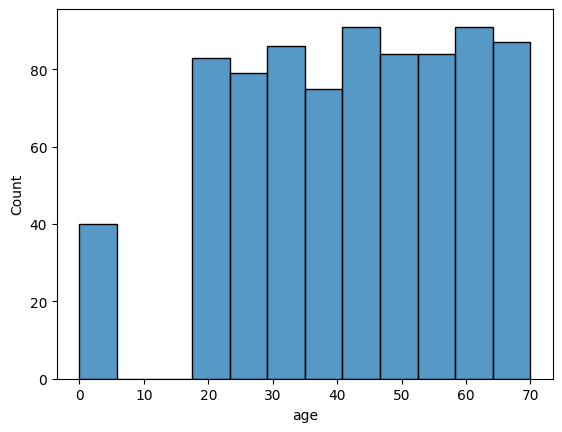

In [46]:
sns.histplot(df["age"])

In [47]:
df["age"] = df["age"].replace(0, np.nan)

In [48]:
impute_cols = ["age"]
imputer_data = df[impute_cols]

In [49]:
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(imputer_data)

In [50]:
df["age"] = imputed_array[:, 0]

In [51]:
df["age"] = df["age"].round().astype(int)

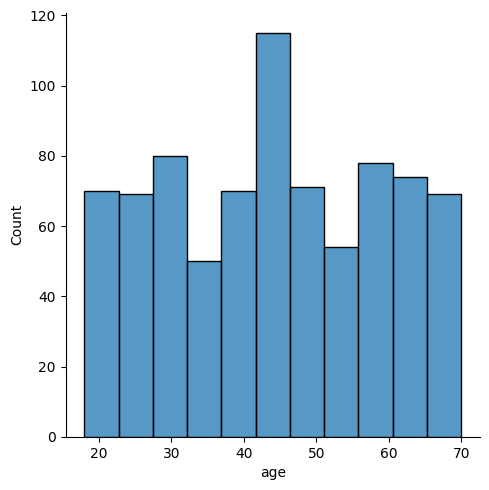

In [52]:
sns.displot(df["age"])

In [53]:
def assign_age_group(age):
    if pd.isna(age):
        return "unknown"
    age = int(age) 
    if age <= 17:
        return "underage"
    elif 18 <= age <= 30:
        return "young adult"
    elif 31 <= age <= 45:
        return "adult"
    elif 46 <= age <= 60:
        return "mid adult"
    else:
        return "senior"

In [54]:
df['age_group'] = df['age'].apply(assign_age_group)

In [55]:
df.head()

,customer_id,first_name,last_name,gender,age,signup_date,region,age_group
0,C0000,patrick,morgan,male,18,2024-07-11,south,young adult
1,C0001,eric,lee,other,36,2020-09-20,east,adult
2,C0002,thomas,pena,female,44,2021-03-07,east,adult
3,C0003,dalton,duran,male,24,2021-08-29,south,young adult
4,C0004,travis,mcclain,male,50,2023-03-29,south,mid adult


In [56]:
df.to_csv(r"C:\Users\yzdn\Desktop\Data Science\Intern Projects\Retail Analysic\Cleaned Data\Cleaned Customer Data.csv", index=False, encoding='utf-8')